# 1) 必要なモジュールをロード

In [1]:
#load module
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
DEBUG = True
def PRINT(*arg):
    if DEBUG:
        print(*arg)

# 2) データ処理

In [3]:
SRC_TRAIN = '../data/train.csv'
SRC_TEST = '../data/test.csv'
df_train = pd.read_csv(SRC_TRAIN)
df_test  = pd.read_csv(SRC_TEST)

## 2.1) データ確認

In [4]:
df_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S


データ説明

|カラム|説明|
|:--|:--|
|PassengerID|乗客番号|
|Survived|1: 生存, 0: 死亡|
|Pclass|乗客階級 （1,2,3の順で上級）|
|Name|名前|
|Sex|性別|
|Age|年齢|
|SibSp|兄弟/配偶者人数|
|Parch|両親/子供人数|
|Ticket|チケット番号|
|Fare|乗船料金|
|Cabin|部屋番号|
|Embarked|乗船した港　Cherbourg、Queenstown、Southampton|

In [5]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## 2.2) データ整形

In [7]:
#男女を01で表現
df_train = df_train.replace("male",0).replace("female",1)
df_test = df_test.replace("male",0).replace("female",1)

C:\Users\moto-PC\Anaconda3230\lib\site-packages\pandas\core\common.py:516: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


##2.3) データ傾向確認

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

・Cabinがかなり欠損している（除外対象）

・Ageは部分的に欠損していることが分かる

##2.4 ) 欠損データ処理

学習に不要なデータを排除

In [10]:
df_train_dropna = df_train.dropna()
df_train_dropna = df_train_dropna.drop('Cabin', axis = 1)
df_train_dropna = df_train_dropna.drop('PassengerId', axis = 1)

##2.5) データ相関分析

In [11]:
df_train_dropna.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.034542,0.532418,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.034542,1.000000,0.046181,-0.306514,-0.103592,0.047496,-0.315235
Sex,0.532418,0.046181,1.000000,-0.184969,0.104291,0.089581,0.130433
Age,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424
SibSp,0.106346,-0.103592,0.104291,-0.156162,1.000000,0.255346,0.286433
Parch,0.023582,0.047496,0.089581,-0.271271,0.255346,1.000000,0.389740
Fare,0.134241,-0.315235,0.130433,-0.092424,0.286433,0.389740,1.000000


・Survivedは性別(Sex)、年齢（Age）、兄弟/配偶者人数(SibSp)と相関が高い

・Ageは乗客階級（Pclass）, 両親/子供人数（Parch）と相関が高い

##2.6) 補完処理

・Ageは部分欠損を起こしてるため、補完処理を実施

###2.6.1) Pclass毎の年齢平均値で補完

C:\Users\moto-PC\Anaconda3230\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


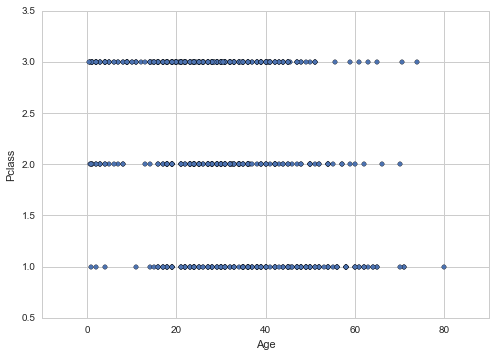

if Pclass == 1, Average Age ==  38.233440860215055
if Pclass == 2, Average Age ==  29.87763005780347
if Pclass == 3, Average Age ==  25.14061971830986


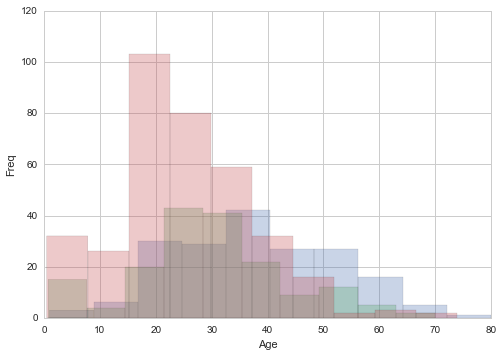

In [12]:
#Age処理のための検討 1　(乗客階級)
ap = pd.concat([df_train['Age'],df_train['Pclass']],axis=1)
ap = ap.dropna()
ap.plot(x='Age',y='Pclass',kind='scatter')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.show()

age_mean_p  = ap['Age'].mean()
age_mean_p1 = ap[ap['Pclass'] == 1]['Age'].mean()
age_mean_p2 = ap[ap['Pclass'] == 2]['Age'].mean()
age_mean_p3 = ap[ap['Pclass'] == 3]['Age'].mean()

PRINT('if Pclass == 1, Average Age == ', age_mean_p1)
PRINT('if Pclass == 2, Average Age == ', age_mean_p2)
PRINT('if Pclass == 3, Average Age == ', age_mean_p3)

ap[ap['Pclass'] == 1]['Age'].hist(alpha=.3)
ap[ap['Pclass'] == 2]['Age'].hist(alpha=.3)
ap[ap['Pclass'] == 3]['Age'].hist(alpha=.3)
plt.xlabel("Age")
plt.ylabel("Freq")
plt.show()

年齢と乗客階級の間に相関が強くは無いが一旦はこれで補完は可能

In [13]:
age_1 = []
for row in range(0,len(df_train)):
    if df_train['Age'][row] > 0:
        age_1.append(df_train['Age'][row])
        pass
    else:
        if df_train['Pclass'][row] == 1:
            age_1.append(age_mean_p1)
        if df_train['Pclass'][row] == 2:
            age_1.append(age_mean_p2)
        if df_train['Pclass'][row] == 3:
            age_1.append(age_mean_p3)
df_train['Age_1'] = age_1

age_1 = []
for row in range(0,len(df_test)):
    if df_test['Age'][row] > 0:
        age_1.append(df_test['Age'][row])
        pass
    else:
        if df_test['Pclass'][row] == 1:
            age_1.append(age_mean_p1)
        if df_test['Pclass'][row] == 2:
            age_1.append(age_mean_p2)
        if df_test['Pclass'][row] == 3:
            age_1.append(age_mean_p3)
df_test['Age_1'] = age_1

###2.6.2) Nameの敬称毎の年齢平均値で補完

In [14]:
#Age処理のための検討 2　(敬称)
honorific_arr = []

for row in range(0,len(df_train)):
    if df_train['Name'][row].lower().find('mr.') > -1 or df_train['Name'][row].lower().find('mr ') > -1:
        honorific_arr.append(0)
        pass
    elif df_train['Name'][row].lower().find('mrs.') > -1 or df_train['Name'][row].lower().find('mrs ') > -1:
        honorific_arr.append(1)
        pass
    elif df_train['Name'][row].lower().find('miss.') > -1 or df_train['Name'][row].lower().find('miss ') > -1:
        honorific_arr.append(2)
        pass
    elif df_train['Name'][row].lower().find('master.') > -1 or df_train['Name'][row].lower().find('master ') > -1:
        honorific_arr.append(3)
        pass
    elif df_train['Name'][row].lower().find('ms.') > -1 or df_train['Name'][row].lower().find('ms ') > -1:
        honorific_arr.append(4)
        pass
    elif df_train['Name'][row].lower().find('dr.') > -1 or df_train['Name'][row].lower().find('dr ') > -1:
        honorific_arr.append(5)
        pass
    else:
        honorific_arr.append(6)
df_train['Honorific'] = honorific_arr

honorific_arr = []
for row in range(0,len(df_test)):
    if df_test['Name'][row].lower().find('mr.') > -1 or df_test['Name'][row].lower().find('mr ') > -1:
        honorific_arr.append(0)
        pass
    elif df_test['Name'][row].lower().find('mrs.') > -1 or df_test['Name'][row].lower().find('mrs ') > -1:
        honorific_arr.append(1)
        pass
    elif df_test['Name'][row].lower().find('miss.') > -1 or df_test['Name'][row].lower().find('miss ') > -1:
        honorific_arr.append(2)
        pass
    elif df_test['Name'][row].lower().find('master.') > -1 or df_test['Name'][row].lower().find('master ') > -1:
        honorific_arr.append(3)
        pass
    elif df_test['Name'][row].lower().find('ms.') > -1 or df_test['Name'][row].lower().find('ms ') > -1:
        honorific_arr.append(4)
        pass
    elif df_test['Name'][row].lower().find('dr.') > -1 or df_test['Name'][row].lower().find('dr ') > -1:
        honorific_arr.append(5)
        pass
    else:
        honorific_arr.append(6)
df_test['Honorific'] = honorific_arr

C:\Users\moto-PC\Anaconda3230\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


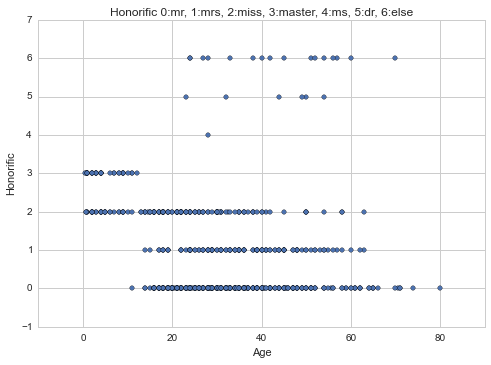

In [15]:
ah = pd.concat([df_train["Age"],df_train["Honorific"]],axis=1)
ah = ah.dropna()
ah.plot(x="Age",y="Honorific",kind="scatter")
plt.title("Honorific 0:mr, 1:mrs, 2:miss, 3:master, 4:ms, 5:dr, 6:else")
plt.xlabel("Age")
plt.ylabel("Honorific")
plt.show()

age_mean_h0 = ah[ah['Honorific'] == 0]['Age'].mean()
age_mean_h1 = ah[ah['Honorific'] == 1]['Age'].mean()
age_mean_h2 = ah[ah['Honorific'] == 2]['Age'].mean()
age_mean_h3 = ah[ah['Honorific'] == 3]['Age'].mean()
age_mean_h4 = ah[ah['Honorific'] == 4]['Age'].mean()
age_mean_h5 = ah[ah['Honorific'] == 5]['Age'].mean()
age_mean_h6 = ah[ah['Honorific'] == 6]['Age'].mean()
age_mean_h = ah['Age'].mean()


傾向の見える敬称　0:mr, 1:mrs, 2:miss, 3:master

それ以外は、全体平均で代替

In [16]:
age_2 = []
for row in range(0,len(df_train)):
    if df_train['Age'][row] > 0:
        age_2.append(df_train['Age'][row])
        pass
    else:
        if df_train['Honorific'][row] == 0:
            age_2.append(age_mean_h0)
        elif df_train['Honorific'][row] == 1:
            age_2.append(age_mean_h1)
        elif df_train['Honorific'][row] == 2:
            age_2.append(age_mean_h2)
        elif df_train['Honorific'][row] == 3:
            age_2.append(age_mean_h3)
        elif df_train['Honorific'][row] == 4:
            age_2.append(age_mean_h4)
        else:
            age_2.append(age_mean_h)
df_train['Age_2'] = age_2

age_2 = []
for row in range(0,len(df_test)):
    if df_test['Age'][row] > 0:
        age_2.append(df_test['Age'][row])
        pass
    else:
        if df_test['Honorific'][row] == 0:
            age_2.append(age_mean_h0)
        elif df_test['Honorific'][row] == 1:
            age_2.append(age_mean_h1)
        elif df_test['Honorific'][row] == 2:
            age_2.append(age_mean_h2)
        elif df_test['Honorific'][row] == 3:
            age_2.append(age_mean_h3)
        elif df_test['Honorific'][row] == 4:
            age_2.append(age_mean_h4)
        else:
            age_2.append(age_mean_h)
df_test['Age_2'] = age_2

##2.7) 特徴量毎の生存分布確認

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [19]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [21]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


1～4の家族は生き残りやすい傾向

In [22]:
df_train[['Honorific', 'Survived']].groupby(['Honorific'], as_index=False).mean()

,Honorific,Survived
0,0,0.158301
1,1,0.790698
2,2,0.700000
3,3,0.575000
4,4,1.000000
5,5,0.428571
6,6,0.312500


1:mrs, 2:miss が生き残る傾向

3:master も同様に生き残る傾向

Age処理のための検討 1 より、Age処理のための検討 2の方が妥当性が高い

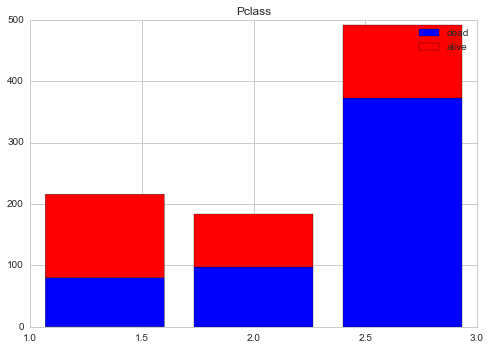

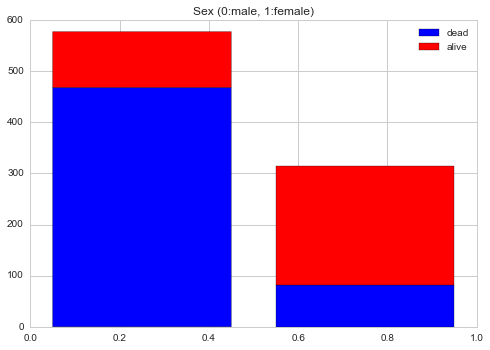

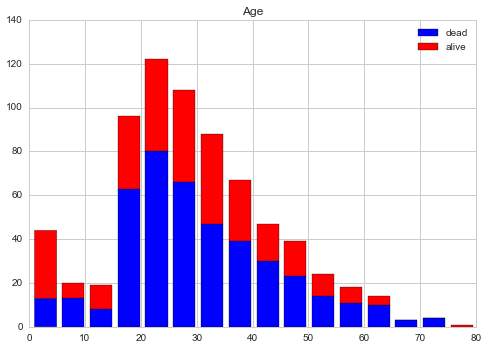

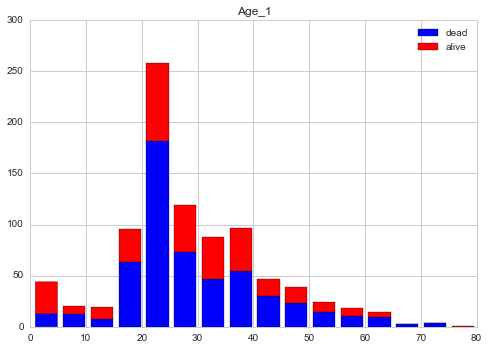

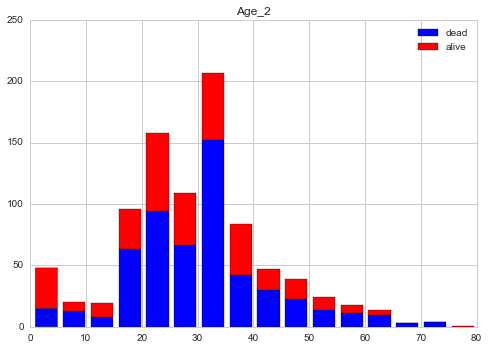

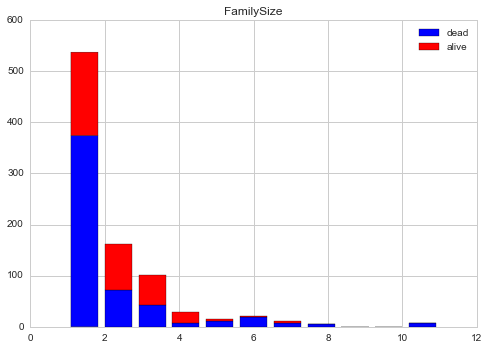

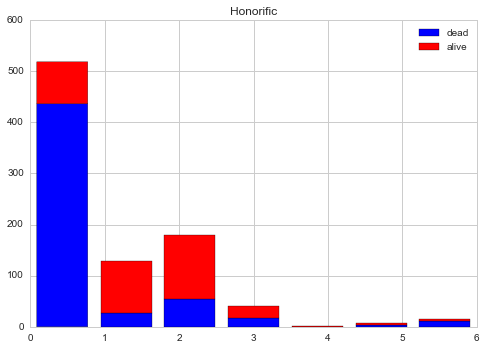

In [23]:
split_data = []
for survived in [0,1]:
    split_data.append(df_train[df_train.Survived==survived])

temp = [i["Pclass"].dropna() for i in split_data]
plt.title('Pclass')
plt.hist(temp, histtype="barstacked", color = ['b', 'r'], label = ['dead', 'alive'], bins=3)
plt.legend()
plt.show()

temp = [i["Sex"].dropna() for i in split_data]
plt.title('Sex (0:male, 1:female)')
plt.hist(temp, histtype="barstacked", color = ['b', 'r'], label = ['dead', 'alive'], bins=2)
plt.legend()
plt.show()

temp = [i["Age"].dropna() for i in split_data]
plt.title('Age')
plt.hist(temp, histtype="barstacked", color = ['b', 'r'], label = ['dead', 'alive'], bins=16)
plt.legend()
plt.show()

temp = [i["Age_1"].dropna() for i in split_data]
plt.title('Age_1')
plt.hist(temp, histtype="barstacked", color = ['b', 'r'], label = ['dead', 'alive'], bins=16)
plt.legend()
plt.show()

temp = [i["Age_2"].dropna() for i in split_data]
plt.title('Age_2')
plt.hist(temp, histtype="barstacked", color = ['b', 'r'], label = ['dead', 'alive'], bins=16)
plt.legend()
plt.show()


temp = [i["FamilySize"].dropna() for i in split_data]
plt.title('FamilySize')
plt.hist(temp, histtype="barstacked", color = ['b', 'r'], label = ['dead', 'alive'], bins=11)
plt.legend()
plt.show()

temp = [i["Honorific"].dropna() for i in split_data]
plt.title('Honorific')
plt.hist(temp, histtype="barstacked", color = ['b', 'r'], label = ['dead', 'alive'], bins=7)
plt.legend()
plt.show()

Age_2は、Age_1のような尖ったピークが起きにくくなっており、微弱にもmasterの部分のデータが考慮されていることが分かる

##2.8) データ相関再確認

In [24]:
df_train_dropna = df_train.dropna()
df_train_dropna = df_train_dropna.drop('Cabin', axis = 1)
df_train_dropna = df_train_dropna.drop('PassengerId', axis = 1)
df_train_dropna.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_1,Honorific,Age_2,FamilySize
Survived,1.000000,-0.034542,0.532418,-0.254085,0.106346,0.023582,0.134241,-0.254085,0.338201,-0.254085,0.077731
Pclass,-0.034542,1.000000,0.046181,-0.306514,-0.103592,0.047496,-0.315235,-0.306514,0.019349,-0.306514,-0.027821
Sex,0.532418,0.046181,1.000000,-0.184969,0.104291,0.089581,0.130433,-0.184969,0.397305,-0.184969,0.121397
Age,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424,1.000000,-0.208270,1.000000,-0.274985
SibSp,0.106346,-0.103592,0.104291,-0.156162,1.000000,0.255346,0.286433,-0.156162,0.037582,-0.156162,0.753754
Parch,0.023582,0.047496,0.089581,-0.271271,0.255346,1.000000,0.389740,-0.271271,0.081590,-0.271271,0.827840
Fare,0.134241,-0.315235,0.130433,-0.092424,0.286433,0.389740,1.000000,-0.092424,0.016755,-0.092424,0.431089
Age_1,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424,1.000000,-0.208270,1.000000,-0.274985
Honorific,0.338201,0.019349,0.397305,-0.208270,0.037582,0.081590,0.016755,-0.208270,1.000000,-0.208270,0.077260
Age_2,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424,1.000000,-0.208270,1.000000,-0.274985


データ解析の結果から次が注目点となる：

・Pclass, Sex, FamilySize, Age_2(Honorific) を特徴量として使える可能性

・SibSpとFamilySizeの差

・Fareの関係性

・Honorificは、Sexよりよい特徴量の可能性

 　-maleの内、masterは生き残りやすいことが想定される

##2.9) データセット準備

In [25]:
from sklearn.cross_validation import train_test_split
#データセット作成
features = ['Pclass', 'Sex', 'FamilySize', 'Age_2', 'Honorific']
#features = ['Sex', 'FamilySize', 'Age_2', 'Honorific']
#features = ['Sex', 'FamilySize', 'Age_2']
x = df_train[features]
y = df_train['Survived']
x_test = df_test[features]
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size=0.8, random_state=0)

In [26]:
x_test.describe()

,Pclass,Sex,FamilySize,Age_2,Honorific
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,1.839713,30.156630,0.789474
std,0.841838,0.481622,1.519072,13.027043,1.131067
min,1.000000,0.000000,1.000000,0.170000,0.000000
25%,1.000000,0.000000,1.000000,22.000000,0.000000
50%,3.000000,0.000000,1.000000,30.000000,0.000000
75%,3.000000,1.000000,2.000000,35.910714,2.000000
max,3.000000,1.000000,11.000000,76.000000,6.000000


##2.10) データ正規化
平均 0 / 分散 1 へ正規化

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x_std = sc.transform(x)
sc.fit(x_train)
x_train_std = sc.transform(x_train)
sc.fit(x_eval)
x_eval_std = sc.transform(x_eval)
sc.fit(x_test)
x_test_std = sc.transform(x_test)

#3) 機械学習

今回は下記6パターン

・Random Forest
・K Nearest Neighbor  
・SGDClassifier(パーセプトロン)  
・Support Vector Machine  
・Gradient Boosting Decision Tree  
・Deep Learning(by Chainer)

In [28]:
from sklearn.metrics import classification_report

##3.1) Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_std, y_train) 
y_eval_pred = rf.predict(x_eval_std)
#所属クラスの確率を推定
PRINT(rf.predict_proba(x_eval_std))
PRINT('[y_eval] accuracy = ', round((1 - np.mean((y_eval ^ y_eval_pred))) * 100, 5), '%')
PRINT('[y_eval] std      = ', round(np.std(y_eval - y_eval_pred), 5))

[[ 0.98571429  0.01428571]
 [ 0.98571429  0.01428571]
 [ 0.8         0.2       ]
 ..., 
 [ 0.5         0.5       ]
 [ 1.          0.        ]
 [ 1.          0.        ]]
[y_eval] accuracy =  79.38289 %
[y_eval] std      =  0.45395


In [30]:
y_true, y_pred = y_eval, rf.predict(x_eval_std)
print(classification_report(y_true, y_pred, target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.84      0.83      0.84       452
    Survived       0.71      0.73      0.72       261

 avg / total       0.80      0.79      0.79       713



|item|説明|数式|
|:--|:--|
|precision|適合率 (正確性:システムが正しいと判定したものの内、本当に正しく判断できたのの割合)|tp/(tp+fp)|
|recall|再現率 (網羅性:正しく判断されるべきものの内、本当に正しく判断できたのの割合)|tp/(tp+fn)|
|f1 score|F値|(2×適合率×再現率)/(適合率＋再現率)|

||1 (real)|0 (real)|
|:--|:--|:--|
|1 (pred)|tp|fp|
|0 (pred)|fn|tn|


In [31]:
#submission scored 0.64593
rf.fit(x_std, y) 
y_test_pred = rf.predict(x_test_std)

##3.2) K Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train_std, y_train) 
y_eval_pred = knc.predict(x_eval_std)
#所属クラスの確率を推定
PRINT(knc.predict_proba(x_eval_std))
PRINT('[y_eval] accuracy = ', round((1 - np.mean((y_eval ^ y_eval_pred))) * 100, 5), '%')        
PRINT('[y_eval] std      = ', round(np.std(y_eval - y_eval_pred), 5))

[[ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.66666667  0.33333333]
 ..., 
 [ 0.33333333  0.66666667]
 [ 1.          0.        ]
 [ 1.          0.        ]]
[y_eval] accuracy =  78.82188 %
[y_eval] std      =  0.45693


In [33]:
y_true, y_pred = y_eval, knc.predict(x_eval_std)
print(classification_report(y_true, y_pred, target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.86      0.79      0.83       452
    Survived       0.68      0.79      0.73       261

 avg / total       0.80      0.79      0.79       713



In [34]:
#submission scored 0.71770
knc.fit(x_std, y) 
KNeighborsClassifier(...)
y_test_pred = knc.predict(x_test_std)

##3.3)  SGDClassifier : パーセプトロン

In [35]:
from sklearn.linear_model import SGDClassifier
# 確率的勾配降下法バージョンのパーセプトロンを生成
ppn = SGDClassifier(loss="perceptron")
ppn.fit(x_train_std, y_train)
y_eval_pred = ppn.predict(x_eval_std)
#所属クラスの確率を推定
PRINT('[y_eval] accuracy = ', round((1 - np.mean((y_eval ^ y_eval_pred))) * 100, 5), '%')
PRINT('[y_eval] std      = ', round(np.std(y_eval - y_eval_pred), 5))

[y_eval] accuracy =  74.19355 %
[y_eval] std      =  0.49278


In [36]:
y_true, y_pred = y_eval, ppn.predict(x_eval_std)
print(classification_report(y_true, y_pred, target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.75      0.89      0.81       452
    Survived       0.72      0.48      0.58       261

 avg / total       0.74      0.74      0.73       713



In [37]:
#submission scored 0.63158
ppn.fit(x_std, y)
y_test_pred = ppn.predict(x_test_std)

##3.4) Support Vector Machine

In [38]:
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

C_list = [1, 10, 100, 1000]
g_list = [0.001, 0.0001]

params_svc = [
    {'kernel': ['linear'],  'C': C_list},
    {'kernel': ['sigmoid'], 'C': C_list, 'gamma': g_list},
    {'kernel': ['rbf'],     'C': C_list, 'gamma': g_list},
    ]
    #[memo] others (poly, precomputed)

gsvc = GridSearchCV(SVC(), params_svc, cv=10, scoring='f1_weighted', n_jobs = -1)
gsvc.fit(x_std, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='f1_weighted', verbose=0)

In [39]:
y_true, y_pred = y_eval, gsvc.predict(x_eval_std)
print(classification_report(y_true, y_pred, target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.85      0.88      0.87       452
    Survived       0.78      0.74      0.76       261

 avg / total       0.83      0.83      0.83       713



In [40]:
#gsvc.grid_scores_
#gsvc.best_params_
gsvc.best_score_

0.82041154975125041

In [41]:
#submission scored 0.78947
y_test_pred = gsvc.predict(x_test_std)

##3.5) Gradient Boosting Decision Tree

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=2)
gbdt.fit(x_train_std, y_train)
y_eval_pred = gbdt.predict(x_eval_std)
#所属クラスの確率を推定
PRINT(gbdt.predict_proba(x_eval_std))
PRINT('[y_eval] accuracy = ', round((1 - np.mean((y_eval ^ y_eval_pred))) * 100, 5), '%')
PRINT('[y_eval] std      = ', round(np.std(y_eval - y_eval_pred), 5))

[[ 0.90305255  0.09694745]
 [ 0.90305255  0.09694745]
 [ 0.96660795  0.03339205]
 ..., 
 [ 0.52373388  0.47626612]
 [ 0.9818314   0.0181686 ]
 [ 0.91278242  0.08721758]]
[y_eval] accuracy =  80.2244 %
[y_eval] std      =  0.44132


In [43]:
y_true, y_pred = y_eval, gbdt.predict(x_eval_std)
print(classification_report(y_true, y_pred, target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.88      0.80      0.84       452
    Survived       0.70      0.80      0.75       261

 avg / total       0.81      0.80      0.80       713



In [44]:
gbdt.score(x_eval_std, y_eval_pred)

1.0

In [45]:
#submission scored 0.78469 (max_depth==1)
#submission scored 0.77033 (max_depth==2)
#submission scored 0.76077 (max_depth==3)
gbdt.fit(x_std, y)
y_test_pred = gbdt.predict(x_test_std)

###Gradient Boosting Decision Tree with GridSearchCV

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
params_gbdt =[ {'n_estimators': [20, 30, 40, 50], 'learning_rate':[0.01], 'max_depth': [1,2,3,4], 'min_samples_split': [3]}, ]

ggbdt = GridSearchCV(
    estimator = GradientBoostingClassifier(),
    param_grid = params_gbdt, 
    scoring='roc_auc',
    #scoring='f1_weighted'
    n_jobs=-1,
    #iid=False, 
    cv=10)
ggbdt.fit(x_train_std, y_train)
y_eval_pred = ggbdt.predict(x_eval_std)
#所属クラスの確率を推定
PRINT(ggbdt.predict_proba(x_eval_std))
PRINT('[y_eval] accuracy = ', round((1 - np.mean((y_eval ^ y_eval_pred))) * 100, 5), '%')
PRINT('[y_eval] std      = ', round(np.std(y_eval - y_eval_pred), 5))

[[ 0.6097616  0.3902384]
 [ 0.6097616  0.3902384]
 [ 0.6183872  0.3816128]
 ..., 
 [ 0.4659079  0.5340921]
 [ 0.6097616  0.3902384]
 [ 0.6097616  0.3902384]]
[y_eval] accuracy =  80.92567 %
[y_eval] std      =  0.43666


In [47]:
y_true, y_pred = y_eval, ggbdt.predict(x_eval_std)
print(classification_report(y_true, y_pred, target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.84      0.86      0.85       452
    Survived       0.75      0.73      0.74       261

 avg / total       0.81      0.81      0.81       713



In [48]:
#clf.grid_scores_
ggbdt.best_params_
#clf.best_score_

{'learning_rate': 0.01,
 'max_depth': 2,
 'min_samples_split': 3,
 'n_estimators': 20}

In [49]:
#submission scored 0.77033
y_test_pred = ggbdt.predict(x_test_std)

##3.6) Deep Learning

In [50]:
import chainer
import six
import time
import os
#import cudaでcuda実行可能
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
import chainer.functions as F
import chainer.links as L#必要モジュールインポート
import sys
class Model(chainer.Chain):
    def __init__(self, n_in, n_units):
        super(Model, self).__init__(
            l1=F.Linear(n_in, n_units),
            l2=F.Linear(n_units, n_units),
            l3=F.Linear(n_units, n_units),
            l4=F.Linear(n_units, 1),
        )
    
    def __call__(self, x, t):
        h = self.forward(x)
        return F.sigmoid_cross_entropy(h, t), self.get_accuracy(h, t)
    
    def forward(self, x):
        h = F.relu(self.l1(x))
        h = F.relu(self.l2(h))
        h = F.relu(self.l3(h))
        h = self.l4(h)
        return h
    
    def get_accuracy(self, y_pred, y):
        y_pred = F.sigmoid(y_pred)
        y_pred = [[0] if i < 0.5 else [1] for i in y_pred.data]
        y      = np.array(y.data).reshape(-1,)
        y_pred = np.array(y_pred).reshape(-1,)
        return 1 - np.mean((y ^ y_pred))

In [51]:
def run_dnn(n_in, n_units, n_epoch):
    
    model_save_path = './model'
    if os.path.exists(model_save_path) == False:
        os.makedirs(model_save_path)
    
    PRINT('****** create model ******')
    model = Model(n_in, n_units)
    PRINT('model :', model)

    PRINT('****** set optimizer ******')
    optimizer = optimizers.Adam()
    optimizer.setup(model)
    PRINT('optimizer :', optimizer)

    PRINT('****** start train ******')
    batchsize_train = 8
    batchsize_test = 8

    N_train = len(x_train_std)
    N_test =  len(x_eval_std)

    y_train_ = []
    for y in y_train:
        y_train_.append([y])

    y_eval_ = []
    for y in y_eval:
        y_eval_.append([y])

    train_loss_list = []
    eval_loss_list = []
    train_acc_list = []
    eval_acc_list = []
    best_acc   = 0
    best_epoch = 0
    
    for epoch in six.moves.range(0, n_epoch):
        # train
        if epoch % 50 == 0:
            PRINT('epoch :{}'.format(epoch))
        start = time.time()
        perm_train = np.random.permutation(N_train)
        for i in six.moves.range(0, N_train, batchsize_train):
            x_batch = Variable(np.asarray(x_train_std[i:i + batchsize_train]).astype(np.float32))
            y_batch = Variable(np.asarray(y_train_[i:i + batchsize_train]).astype(np.int32))
            model.zerograds()
            loss, acc = model(x_batch, y_batch)
            loss.backward()
            optimizer.update()

        end = time.time()
        elapsed_time = end - start
        throughput = N_train / elapsed_time

        #train_data evaluation
        train_sum_acc = 0
        train_sum_loss = 0

        for i in six.moves.range(0, N_train, batchsize_train):
            x = Variable(np.asarray(x_train_std[i:i + batchsize_train]).astype(np.float32))
            y = Variable(np.asarray(y_train_[i:i + batchsize_train]).astype(np.int32))
            loss, acc = model(x, y)
            train_sum_loss += float(loss.data) * len(y.data)
            train_sum_acc += acc * len(y.data)
        train_loss_list.append(train_sum_loss/N_train)
        train_acc_list.append(train_sum_acc/N_train)

        eval_sum_acc = 0
        eval_sum_loss = 0

        #eval_data evaluation
        for i in six.moves.range(0, N_test, batchsize_test):
            x = Variable(np.asarray(x_eval_std[i:i + batchsize_test]).astype(np.float32))
            y = Variable(np.asarray(y_eval_[i:i + batchsize_test]).astype(np.int32))
            loss, acc = model(x, y)
            eval_sum_loss += float(loss.data) * len(y.data)
            eval_sum_acc += acc * len(y.data)

        eval_loss_list.append(eval_sum_loss/N_test)
        eval_acc_list.append(eval_sum_acc/N_test)
        
        if best_acc != np.array(eval_acc_list).max(): 
            best_acc = np.array(eval_acc_list).max()
            model_name = 'model_acc-{}_nin-{}_nunits-{}_nepoch-{}_epoch-{}.npz'.format(best_acc, n_in, n_units, n_epoch, epoch)
            serializers.save_npz(os.path.join(model_save_path, model_name), model)            
        n_in, n_units, n_epoch
        

    PRINT('Done')
    plt.title('Loss : {0:3.5f}'.format(np.array(eval_loss_list).min()))
    plt.plot(train_loss_list, 'r', label = 'train_data')
    plt.plot(eval_loss_list,  'b', label = 'eval_data')
    plt.xlabel('epoch')
    plt.ylim([0,1])
    plt.show()

    plt.title('Acc : {0:3.5f}'.format(np.array(eval_acc_list).max()))
    plt.plot(train_acc_list, 'r', label = 'train_data')
    plt.plot(eval_acc_list,  'b', label = 'eval_data')
    plt.xlabel('epoch')
    plt.ylim([0.75, 1.00])
    plt.show()

****** create model ******
model : <__main__.Model object at 0x0000000009301940>
****** set optimizer ******
optimizer : <chainer.optimizers.adam.Adam object at 0x0000000009301588>
****** start train ******
epoch :0
epoch :50
epoch :100
epoch :150
Done


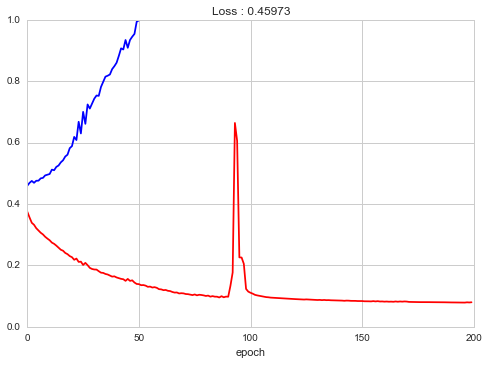

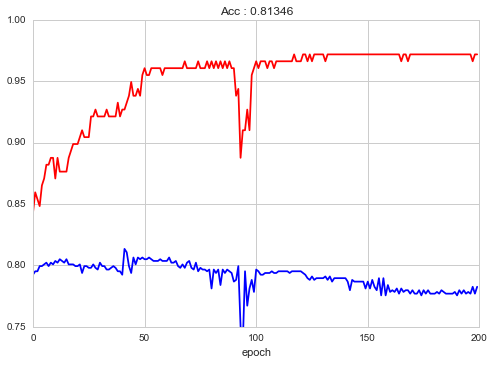

In [52]:
run_dnn(n_in=5, n_units=128, n_epoch=200)

****** create model ******
model : <__main__.Model object at 0x000000000A442668>
****** set optimizer ******
optimizer : <chainer.optimizers.adam.Adam object at 0x00000000093011D0>
****** start train ******
epoch :0
epoch :50
epoch :100
epoch :150
Done


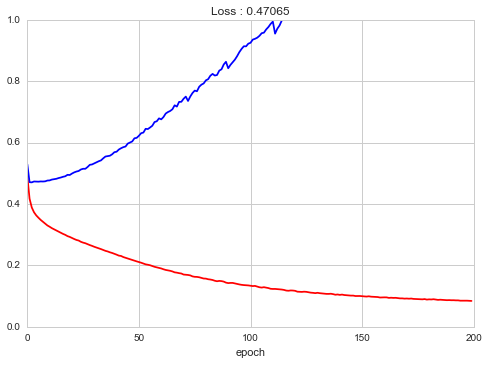

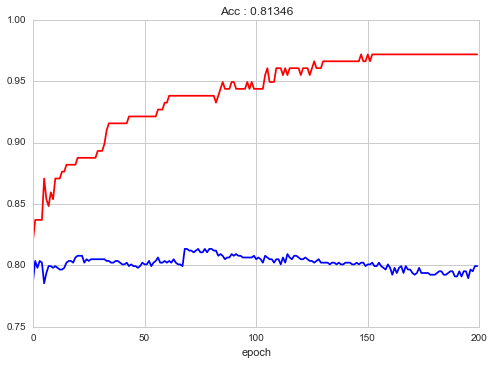

In [53]:
run_dnn(n_in=5, n_units=64, n_epoch=200)

****** create model ******
model : <__main__.Model object at 0x0000000008EF59E8>
****** set optimizer ******
optimizer : <chainer.optimizers.adam.Adam object at 0x0000000008EF4630>
****** start train ******
epoch :0
epoch :50
epoch :100
epoch :150
Done


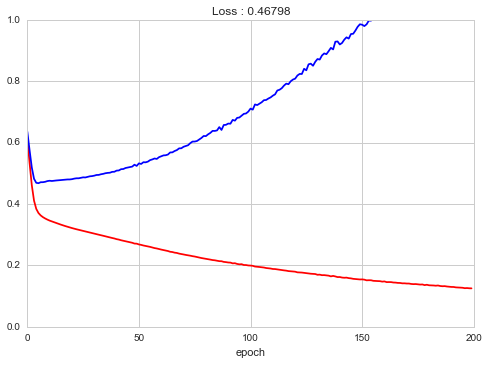

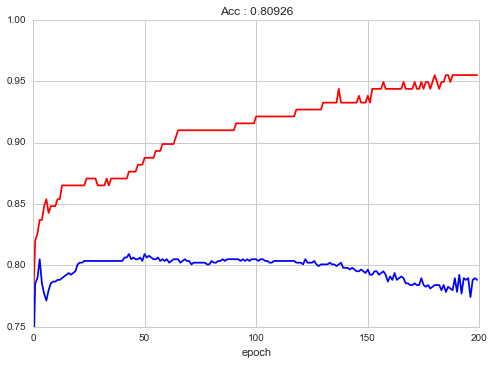

In [54]:
run_dnn(n_in=5, n_units=32, n_epoch=200)

****** create model ******
model : <__main__.Model object at 0x0000000008FA5E80>
****** set optimizer ******
optimizer : <chainer.optimizers.adam.Adam object at 0x0000000008FA3E48>
****** start train ******
epoch :0
epoch :50
epoch :100
epoch :150
Done


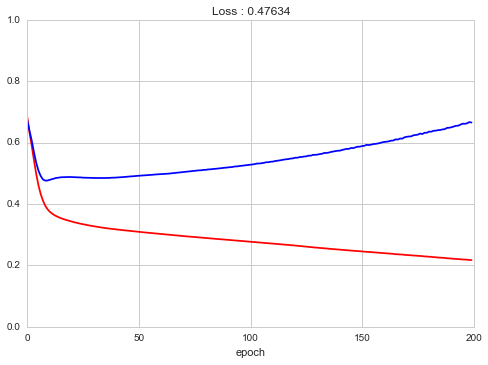

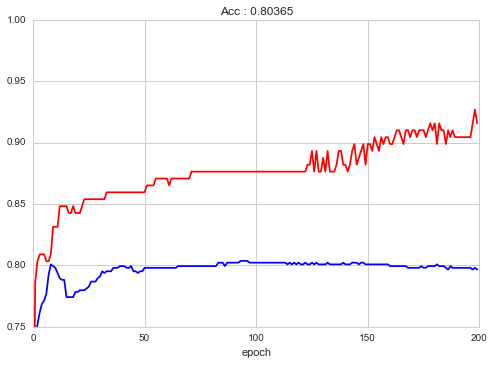

In [55]:
run_dnn(n_in=5, n_units=16, n_epoch=200)

****** create model ******
model : <__main__.Model object at 0x000000000906B048>
****** set optimizer ******
optimizer : <chainer.optimizers.adam.Adam object at 0x0000000008FA3F98>
****** start train ******
epoch :0
epoch :50
epoch :100
epoch :150
Done


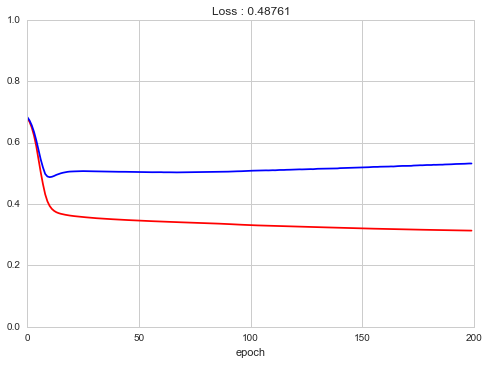

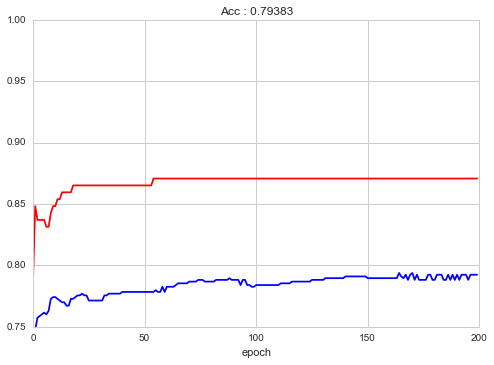

In [56]:
run_dnn(n_in=5, n_units=8, n_epoch=200)

メモ:次のエラー時の対処  
InvalidType:   
Invalid operation is performed in: SoftmaxCrossEntropy (Forward  
Expect: in_types[1].ndim == in_types[0].ndim - 1  
Actual: 2 != 1  
対処法は、ソフトマックス交差エントロピーはint32型のnumarrayへ変更

In [57]:
y_eval_pred = []
y_eval_ = [[y] for y in y_eval]

batchsize_test = 8
model = Model(n_in=5, n_units=128)
#submission scored 0.74641
model_save_path = './model'
model_name = 'model_acc-0.8092566619915849_nin-5_nunits-128_nepoch-256_epoch-41.npz'
serializers.load_npz(os.path.join(model_save_path, model_name), model)

for i in six.moves.range(0, len(x_eval_std), batchsize_test):
    x = Variable(np.asarray(x_eval_std[i:i + batchsize_test]).astype(np.float32))
    y = Variable(np.asarray(y_eval_[i:i + batchsize_test]).astype(np.int32))
    t = F.sigmoid(model.forward(x))
    y_eval_pred.extend([[0] if i < 0.5 else [1] for i in t.data])
    PRINT('predict :',[0 if i < 0.5 else 1 for i in t.data])
    PRINT('real    :',[0 if i < 0.5 else 1 for i in y.data])
    PRINT('------------------------------------')


predict : [0, 0, 0, 1, 1, 0, 1, 1]
real    : [0, 0, 0, 1, 1, 1, 1, 1]
------------------------------------
predict : [1, 1, 0, 1, 0, 1, 1, 1]
real    : [1, 1, 0, 1, 0, 1, 1, 0]
------------------------------------
predict : [0, 0, 0, 1, 0, 1, 0, 0]
real    : [0, 0, 0, 1, 0, 1, 0, 0]
------------------------------------
predict : [1, 1, 0, 1, 1, 0, 0, 0]
real    : [0, 1, 0, 1, 1, 0, 0, 1]
------------------------------------
predict : [0, 0, 0, 1, 0, 0, 0, 0]
real    : [0, 1, 0, 1, 0, 0, 0, 0]
------------------------------------
predict : [0, 0, 0, 0, 1, 0, 0, 1]
real    : [1, 0, 0, 0, 1, 0, 0, 1]
------------------------------------
predict : [0, 0, 0, 1, 1, 0, 0, 0]
real    : [0, 0, 1, 1, 1, 0, 1, 0]
------------------------------------
predict : [0, 0, 0, 0, 0, 0, 1, 1]
real    : [0, 0, 0, 1, 0, 0, 1, 0]
------------------------------------
predict : [0, 0, 1, 0, 1, 1, 1, 1]
real    : [1, 0, 1, 0, 1, 1, 1, 1]
------------------------------------
predict : [1, 0, 0, 1, 0, 1, 0, 0]
re

In [58]:
y_eval_     = np.array(y_eval_).reshape(-1,)
y_eval_pred = np.array(y_eval_pred).reshape(-1,)
PRINT('[y_eval] accuracy = ', round((1 - np.mean((y_eval_ ^ y_eval_pred))) * 100, 5), '%')
PRINT('[y_eval] std      = ', round(np.std(y_eval_ - y_eval_pred), 5))

[y_eval] accuracy =  80.92567 %
[y_eval] std      =  0.4363


In [59]:
print(classification_report(y_eval_, y_eval_pred, target_names=["not Survived", "Survived"]))

              precision    recall  f1-score   support

not Survived       0.86      0.83      0.85       452
    Survived       0.73      0.77      0.75       261

 avg / total       0.81      0.81      0.81       713



In [60]:
y_test_pred = []
x = Variable(np.asarray(x_test_std).astype(np.float32))
t = F.sigmoid(model.forward(x))
y_test_pred.extend([[0] if i < 0.5 else [1] for i in t.data])
y_test_pred = np.array(y_test_pred).reshape(-1,)

#4) 予測データ出力 (for submiting)

In [61]:
#check
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [62]:
import datetime
import os
import shutil

now = datetime.datetime.now()
date = now.strftime("%Y%m%d_%H%M%S")
save_path = '../result/' + date
if os.path.exists(save_path) == False:
    os.makedirs(save_path)

py_file = 'kernel.ipynb'
shutil.copyfile(py_file, save_path + "/" + py_file)

with open(save_path + "/predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df_test['PassengerId'].astype(int), y_test_pred.astype(int)):
        writer.writerow([pid, survived])